In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
# Read in CSV file

df = pd.read_csv('plate9290_RVs.csv').drop(['Unnamed: 0', 'Plate ID'], axis=1)

In [3]:
df = df.sort_values(['Target ID'], ascending=True)

In [4]:
df

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s)
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,0.010245
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080,0.019952
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830,0.018672
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440,0.008684
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565,0.009636
...,...,...,...,...
3393,apo25m.5226.150-08-RV.2M03415658+4626067,57732,-26.530085,0.016809
3392,apo25m.5226.150-08-RV.2M03415658+4626067,57706,-26.743143,0.010706
3406,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243,0.021124
3398,apo25m.5226.150-08-RV.2M03415658+4626067,57789,-26.565876,0.009245


## Step 1
- Plot ΔRV against MJD, try to locate pattern

## To Do
- ~For unique target in total df, create df for just that target's data~
- ~Take RV data for each target and calculate avg~
- ~For each RV data point in each df, find ΔRV = RV - RVavg~
- ~Combine all ΔRVs for all dfs, add to total df~
- ~Plot y=ΔRV, x=MJD~

In [5]:
# Identify list of unique targets

unique_targets = Counter(df['Target ID'])
unique_targets_list = unique_targets.keys()

In [6]:
# unique_targets

In [7]:
len(unique_targets)

213

## Step 1.5
- Calculate ΔRV_j = RV_j - < RV >
- j denotes epoch (MJD?)
- 'epoch', an arbitrarily fixed date relative to which stellar/planetary measurements are expressed

## Questions
- Does it matter that uncertainty is for OBSVREL not OBSVHELIO?

In [8]:
RV_j = list(df['OBSVHELIO (km/s)'])

In [9]:
weightedRVs = []

for target in unique_targets_list:
    target_df = df[df['Target ID'] == target]
    targetRV_j = list(target_df['OBSVHELIO (km/s)'])
    sigma = list(target_df['OBSVREL Error (km/s)'])
    weightedavg = sum([targetRV_j[i] * sigma[i] for i in range(len(targetRV_j))]) / sum([sigma[i] for i in range(len(sigma))])
    for j in range(16):
        weightedRVs.append(weightedavg)

In [10]:
weightedRVs

[-86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -86.44708950874222,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -2.5905260249817035,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 -20.562514475304,
 12.4449

In [11]:
df['<RV>'] = weightedRVs
# df['<RV>'] = [abs(rv) for rv in weightedRVs]

In [12]:
df

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,0.010245,-86.44709
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080,0.019952,-86.44709
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830,0.018672,-86.44709
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440,0.008684,-86.44709
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565,0.009636,-86.44709
...,...,...,...,...,...
3393,apo25m.5226.150-08-RV.2M03415658+4626067,57732,-26.530085,0.016809,-26.56311
3392,apo25m.5226.150-08-RV.2M03415658+4626067,57706,-26.743143,0.010706,-26.56311
3406,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243,0.021124,-26.56311
3398,apo25m.5226.150-08-RV.2M03415658+4626067,57789,-26.565876,0.009245,-26.56311


In [13]:
deltaRV_j = [RV_j[i] - weightedRVs[i] for i in range(len(RV_j))]

In [14]:
df['ΔRV'] = deltaRV_j

In [15]:
df.sort_values('ΔRV', ascending=False)

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>,ΔRV
1959,apo25m.5226.150-08-RV.2M03335959+4534540,58006,15.602287,3.578358,-25.524007,41.126294
1512,apo25m.5226.150-08-RV.2M03322119+4723171,58032,17.542360,1.956752,-22.757358,40.299718
991,apo25m.5226.150-08-RV.2M03303128+4559542,58143,20.871874,0.993278,-13.721953,34.593827
2162,apo25m.5226.150-08-RV.2M03343562+4544527,57734,-0.000636,1.380878,-29.121326,29.120690
3149,apo25m.5226.150-08-RV.2M03400642+4701351,58087,-17.536911,2.266302,-46.282497,28.745586
...,...,...,...,...,...,...
312,apo25m.5226.150-08-RV.2M03274066+4601585,58032,-47.295130,2.931279,-18.999307,-28.295823
1822,apo25m.5226.150-08-RV.2M03332225+4725193,58114,-38.664597,1.081097,-10.123168,-28.541429
1518,apo25m.5226.150-08-RV.2M03322119+4723171,58114,-55.707108,5.909284,-22.757358,-32.949750
1784,apo25m.5226.150-08-RV.2M03331168+4604257,58032,-26.816109,1.158200,10.986775,-37.802884


In [20]:
df.sort_values('OBSVREL Error (km/s)', ascending=False)

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>,ΔRV
3150,apo25m.5226.150-08-RV.2M03400642+4701351,58114,-36.854230,7.764388,-46.282497,9.428267
1518,apo25m.5226.150-08-RV.2M03322119+4723171,58114,-55.707108,5.909284,-22.757358,-32.949750
3141,apo25m.5226.150-08-RV.2M03400642+4701351,57788,-38.818024,5.590215,-46.282497,7.464473
1509,apo25m.5226.150-08-RV.2M03322119+4723171,57788,-7.094740,5.370180,-22.757358,15.662618
69,apo25m.5226.150-08-RV.2M03262567+4559489,57788,-24.200636,5.249305,-36.514726,12.314090
...,...,...,...,...,...,...
1642,apo25m.5226.150-08-RV.2M03324489+4623388,58063,-70.979230,0.001408,-66.462187,-4.517043
3334,apo25m.5226.150-08-RV.2M03413804+4551198,57789,-39.195503,0.001387,-39.265492,0.069989
3343,apo25m.5226.150-08-RV.2M03413804+4551198,58143,-39.596684,0.001373,-39.265492,-0.331192
3338,apo25m.5226.150-08-RV.2M03413804+4551198,58063,-38.910778,0.001300,-39.265492,0.354714


In [21]:
df[df['Target ID'] == 'apo25m.5226.150-08-RV.2M03400642+4701351']

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>,ΔRV
3151,apo25m.5226.150-08-RV.2M03400642+4701351,58143,-37.475870,2.093349,-46.282497,8.806627
3150,apo25m.5226.150-08-RV.2M03400642+4701351,58114,-36.854230,7.764388,-46.282497,9.428267
3149,apo25m.5226.150-08-RV.2M03400642+4701351,58087,-17.536911,2.266302,-46.282497,28.745586
3148,apo25m.5226.150-08-RV.2M03400642+4701351,58085,-23.912241,2.606278,-46.282497,22.370256
3147,apo25m.5226.150-08-RV.2M03400642+4701351,58068,-73.017830,1.915847,-46.282497,-26.735333
3145,apo25m.5226.150-08-RV.2M03400642+4701351,58054,-26.345135,2.445565,-46.282497,19.937362
3144,apo25m.5226.150-08-RV.2M03400642+4701351,58032,-57.622078,2.237586,-46.282497,-11.339581
3146,apo25m.5226.150-08-RV.2M03400642+4701351,58063,-39.951515,1.920422,-46.282497,6.330982
3142,apo25m.5226.150-08-RV.2M03400642+4701351,57789,-32.280552,2.394308,-46.282497,14.001945
3141,apo25m.5226.150-08-RV.2M03400642+4701351,57788,-38.818024,5.590215,-46.282497,7.464473


In [23]:
df_cutoff = df.loc[(df['ΔRV'] < 1) & (df['ΔRV'] > -1)]

In [24]:
df_cutoff.sort_values('ΔRV')

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>,ΔRV
2800,apo25m.5226.150-08-RV.2M03380104+4603136,57706,-13.921528,0.003672,-12.953883,-0.967645
2806,apo25m.5226.150-08-RV.2M03380104+4603136,57789,-13.914422,0.003257,-12.953883,-0.960539
1756,apo25m.5226.150-08-RV.2M03330449+4732443,58085,-56.091194,0.064767,-55.142317,-0.948877
1602,apo25m.5226.150-08-RV.2M03324059+4533286,57734,-7.992001,1.341898,-7.081719,-0.910282
3114,apo25m.5226.150-08-RV.2M03400345+4520415,58063,-5.087015,0.645605,-4.255932,-0.831083
...,...,...,...,...,...,...
1597,apo25m.5226.150-08-RV.2M03324011+4535317,58087,-47.761610,0.028326,-48.668094,0.906484
2810,apo25m.5226.150-08-RV.2M03380104+4603136,58063,-12.040310,0.002886,-12.953883,0.913573
378,apo25m.5226.150-08-RV.2M03281678+4513003,58063,3.644756,0.057708,2.713092,0.931664
376,apo25m.5226.150-08-RV.2M03281678+4513003,58032,3.659941,0.088608,2.713092,0.946849


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

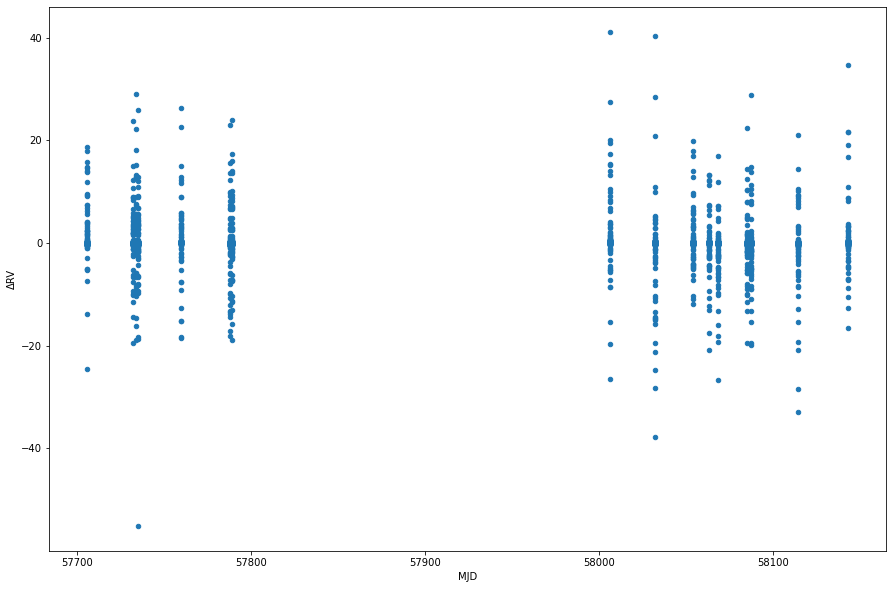

In [25]:
df.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter', figsize=(15,10))

<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

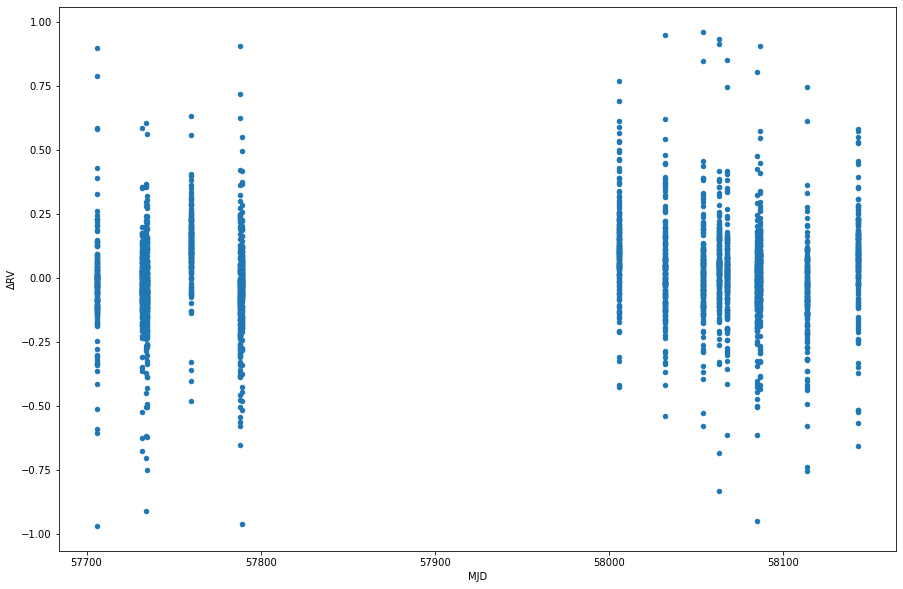

In [26]:
df_cutoff.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter', figsize=(15,10))

In [45]:
# Identify list of unique MJDs

unique_mjd = Counter(df['MJD'])
unique_mjd_list = unique_mjd.keys()

In [46]:
unique_mjd_list

dict_keys([57706, 58143, 58114, 58087, 58085, 58063, 58054, 58032, 58068, 57789, 57788, 57760, 57735, 57734, 57732, 58006])

In [40]:
# Obtain weighted average ΔRV for each MJD

combined_weightedRVs = []

for mjd in unique_mjd_list:
    mjd_df = df_bad[df_bad['MJD'] == mjd]
    mjd_RVs = list(mjd_df['ΔRV'])
    mjd_sigma = list(mjd_df['OBSVREL Error (km/s)'])
    weight = [1 / (mjd_sigma[s]**2) for s in range(len(mjd_sigma))]
    print('Sum of ΔRV for MJD', mjd, ':', sum(mjd_RVs))
    print('Sum of weights:', sum(weight))
    combined_weightedavg = sum([mjd_RVs[r] * weight[r] for r in range(len(mjd_RVs))]) / sum(weight) #[r] for r in range(len(mjd_sigma)))
    # combined_weightedavg = sum([mjd_RVs[r] * mjd_sigma[r] for r in range(len(mjd_RVs))]) / sum(mjd_sigma) #[r] for r in range(len(mjd_sigma)))
    combined_weightedRVs.append(combined_weightedavg)

Sum of ΔRV for MJD 57706 : -3.8998215149803173
Sum of weights: 4291752.119677863
Sum of ΔRV for MJD 58143 : 12.379922485689438
Sum of weights: 6731679.588005798
Sum of ΔRV for MJD 58114 : -10.91450155970655
Sum of weights: 1378354.5700824112
Sum of ΔRV for MJD 58087 : 5.084236040522046
Sum of weights: 5563717.416805604
Sum of ΔRV for MJD 58085 : -6.959567190079474
Sum of weights: 4627294.602975273
Sum of ΔRV for MJD 58063 : 8.545357353152337
Sum of weights: 7337704.798583684
Sum of ΔRV for MJD 58054 : 3.2286464137701714
Sum of weights: 5775348.5201352965
Sum of ΔRV for MJD 58032 : 5.888853519189173
Sum of weights: 2544646.622286594
Sum of ΔRV for MJD 58068 : 2.264031794528901
Sum of weights: 5665542.79546532
Sum of ΔRV for MJD 57789 : -3.08303612904486
Sum of weights: 5237553.822089278
Sum of ΔRV for MJD 57788 : -11.47143968481658
Sum of weights: 1180328.518300221
Sum of ΔRV for MJD 57760 : 20.985134803330713
Sum of weights: 3222734.8405430163
Sum of ΔRV for MJD 57735 : -8.837961015400

In [41]:
combined_weightedRVs

[-0.09074977117252511,
 0.051936933323339686,
 -0.05111122833447311,
 0.086665222545165,
 0.022736998062197575,
 0.08824972119994577,
 0.03711061909055734,
 0.03138012552296679,
 0.04296740706836883,
 -0.04901531076123321,
 -0.11536461653587521,
 0.09722286201394409,
 -0.08035147781765992,
 -0.02305196362769338,
 -0.10129515931944673,
 0.08484316909658798]

In [42]:
weightedavg_data = [unique_mjd_list, combined_weightedRVs]
weightedavg_df = pd.DataFrame(weightedavg_data).transpose()
weightedavg_df.columns = ['MJD', 'Combined ΔRV (km/s)']

In [43]:
weightedavg_df

,MJD,Combined ΔRV (km/s)
0,57706.0,-0.090750
1,58143.0,0.051937
2,58114.0,-0.051111
3,58087.0,0.086665
4,58085.0,0.022737
5,58063.0,0.088250
6,58054.0,0.037111
7,58032.0,0.031380
8,58068.0,0.042967
9,57789.0,-0.049015


<AxesSubplot:xlabel='MJD', ylabel='Combined ΔRV (km/s)'>

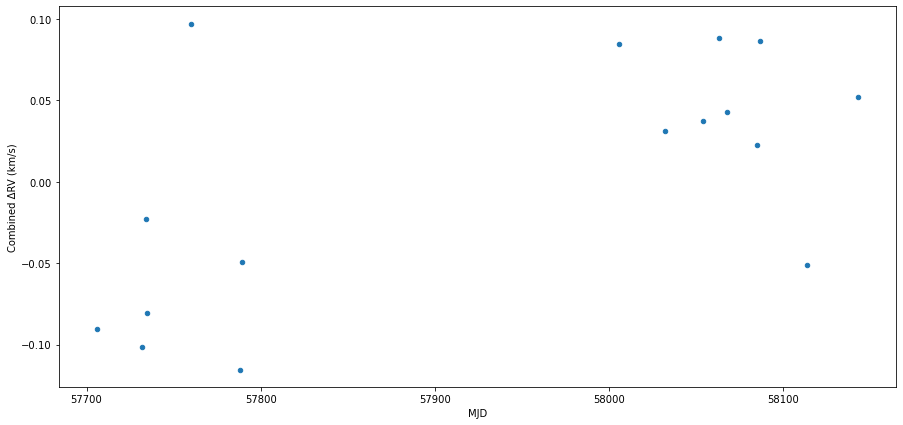

In [44]:
weightedavg_df.plot(x='MJD', y='Combined ΔRV (km/s)', kind='scatter', figsize=(15,7))

In [30]:
# Obtain average RV and ΔRV for each target
# Find better way to do this!

all_delta_rvs = []
all_avg_rvs = []

for target in unique_targets_list:
    target_df = df[df['Target ID'] == target]
    # print('Single Target DF:', target_df)
    target_rvs = list(target_df['OBSVHELIO (km/s)'])
    # abs_rvs = [abs(rv) for rv in target_rvs]
    # print('All RVs for Target:', target_rvs)
    avg_rv = sum(target_df['OBSVHELIO (km/s)']) / len(target_df['OBSVHELIO (km/s)']) # Should be 16
    # print(abs_rvs)
    # print(avg_rv)
    # print('RV Sum:', sum(list(target_df['OBSVHELIO (km/s)'])))
    # print('RV Count:', len(target_df['OBSVHELIO (km/s)']))
    # print('Avg RV:', avg_rv)
    # print('Abs Avg RV:', abs(avg_rv))
    delta_rvs = []
    for trv in target_rvs:
        delta_rv = abs(abs(avg_rv) - abs(trv)) # Should this be an abs value?
        # print(delta_rv)
        delta_rvs.append(delta_rv)
        all_avg_rvs.append(avg_rv)
        # print(abs(trv))
        # print(delta_rv)
    # print(target_rvs)
    all_delta_rvs.append(delta_rvs)
    # print(avg_rv)

In [32]:
max(flat_all_delta_rvs)

59.63525031249999

In [33]:
# Add average RV and ΔRV columns to dataframe

df['Avg RV'] = all_avg_rvs
df['ΔRV'] = flat_all_delta_rvs

In [34]:
# Updated dataframe!

df

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),Avg RV,ΔRV
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,0.010245,-86.460343,0.105361
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080,0.019952,-86.460343,0.364263
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830,0.018672,-86.460343,0.070487
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440,0.008684,-86.460343,0.072097
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565,0.009636,-86.460343,0.109222
...,...,...,...,...,...,...
3553,apo25m.5226.150-08-RV.2M03415658+4626067,57732,-26.530085,0.016809,-26.555161,0.025076
3552,apo25m.5226.150-08-RV.2M03415658+4626067,57706,-26.743143,0.010706,-26.555161,0.187982
3566,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243,0.021124,-26.555161,0.044082
3558,apo25m.5226.150-08-RV.2M03415658+4626067,57789,-26.565876,0.009245,-26.555161,0.010715


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

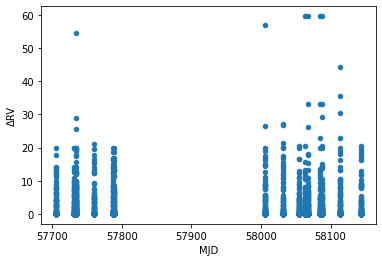

In [35]:
# Initial plot - lots of unexpected outliers?

df.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter')

## Questions
- What is causing the weird outliers?
- What should be done about them?

## Step 2
- Adjust plot, check for visible pattern
- If no pattern, try PCA

In [36]:
# Check ΔRV values

df.sort_values(['ΔRV'], ascending=False)

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),Avg RV,ΔRV
3002,apo25m.5226.150-08-RV.2M03382827+4600480,58063,0.000000,0.000000,-59.635250,59.635250
3005,apo25m.5226.150-08-RV.2M03382827+4600480,58087,0.000000,0.000000,-59.635250,59.635250
3004,apo25m.5226.150-08-RV.2M03382827+4600480,58085,0.000000,0.000000,-59.635250,59.635250
3003,apo25m.5226.150-08-RV.2M03382827+4600480,58068,0.000000,0.000000,-59.635250,59.635250
615,apo25m.5226.150-08-RV.2M03290691+4658407,58006,0.000000,0.000000,-57.020924,57.020924
...,...,...,...,...,...,...
1337,apo25m.5226.150-08-RV.2M03312593+4525270,58054,-35.161705,0.010492,-35.161978,0.000273
498,apo25m.5226.150-08-RV.2M03283154+4559080,57734,-8.638548,0.005007,-8.638805,0.000257
1396,apo25m.5226.150-08-RV.2M03314032+4719247,57760,-17.028630,0.008308,-17.028465,0.000165
1518,apo25m.5226.150-08-RV.2M03320573+4727337,58114,-11.017471,0.006487,-11.017594,0.000123


In [44]:
df[df['Target ID'] == 'apo25m.5226.150-08-RV.2M03290691+4658407'].sort_values(['OBSVHELIO (km/s)'], ascending=False)

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),Avg RV,ΔRV
615,apo25m.5226.150-08-RV.2M03290691+4658407,58006,0.000000,0.000000,-57.020924,57.020924
616,apo25m.5226.150-08-RV.2M03290691+4658407,58032,-60.635765,0.018595,-57.020924,3.614841
619,apo25m.5226.150-08-RV.2M03290691+4658407,58068,-60.660023,0.011133,-57.020924,3.639099
612,apo25m.5226.150-08-RV.2M03290691+4658407,57760,-60.663296,0.015915,-57.020924,3.642372
618,apo25m.5226.150-08-RV.2M03290691+4658407,58063,-60.730675,0.009572,-57.020924,3.709751
617,apo25m.5226.150-08-RV.2M03290691+4658407,58054,-60.771310,0.012273,-57.020924,3.750386
608,apo25m.5226.150-08-RV.2M03290691+4658407,57706,-60.807920,0.015906,-57.020924,3.786996
613,apo25m.5226.150-08-RV.2M03290691+4658407,57788,-60.811580,0.026541,-57.020924,3.790656
620,apo25m.5226.150-08-RV.2M03290691+4658407,58085,-60.828526,0.012362,-57.020924,3.807602
621,apo25m.5226.150-08-RV.2M03290691+4658407,58087,-60.834484,0.011351,-57.020924,3.813560


In [38]:
df_cutoff = df.loc[(df_cutoff['ΔRV'] < 0.5) & (df['ΔRV'] > -0.5)]

<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

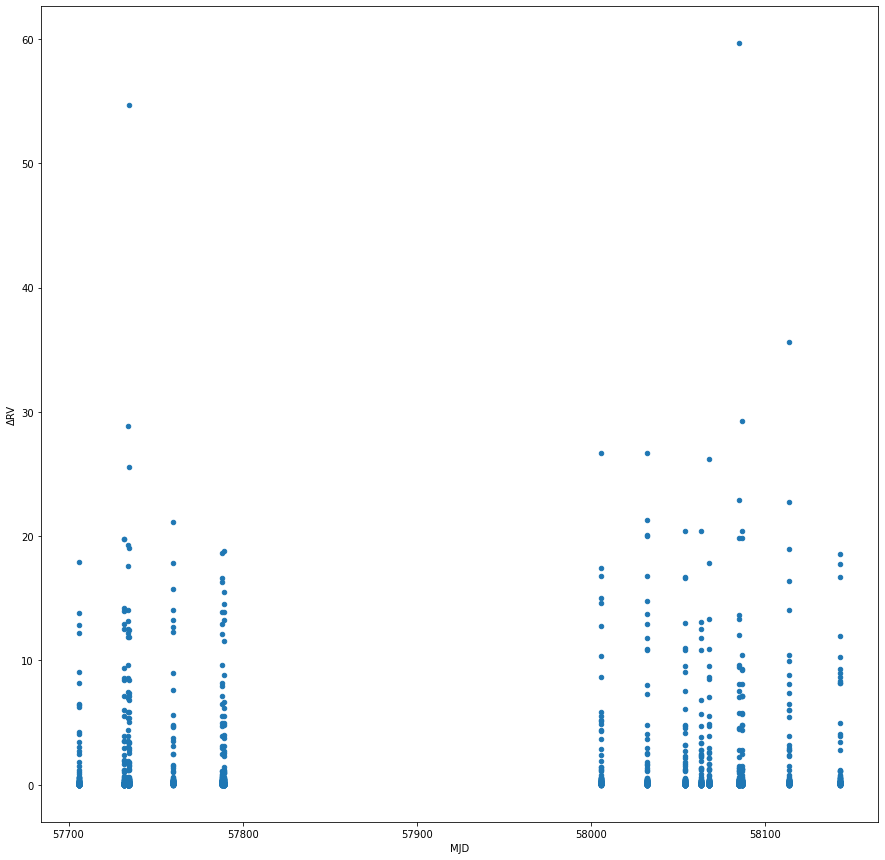

In [39]:
df_cutoff.plot(x='MJD', y='ΔRV', kind='scatter', figsize=(15,15))

## Step 3
- Condense to a single point for each MJD

In [109]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()

In [112]:
unique_mjd_list

dict_keys([57706, 58143, 58114, 58087, 58085, 58063, 58054, 58032, 58068, 57789, 57788, 57760, 57735, 57734, 57732, 58006])

In [119]:
# Obtain average ΔRV for each MJD

all_sigma_rvs = []

for mjd in unique_mjd_list:
    mjd_df = df_cutoff[df_cutoff['MJD'] == mjd]
    # print('Unique MJD df:', mjd_df)
    # print(list(mjd_df['ΔRV']))
    # print(len(mjd_df['ΔRV']))
    sigma_rv = sum(list(mjd_df['ΔRV'])) / len(mjd_df['ΔRV'])
    all_sigma_rvs.append(sigma_rv)

In [120]:
all_sigma_rvs

[1.3556864945543925,
 1.5320859702937581,
 1.9769630447268691,
 1.8171128674604065,
 1.740322663426086,
 1.466107295856595,
 1.3456014756563532,
 1.8036889627753177,
 1.6107448124738593,
 1.4533938928070984,
 1.5963805616736921,
 1.4670831602328118,
 1.6991215978733385,
 1.6031897846684278,
 1.4467420305631367,
 2.0120936446732998]

In [121]:
weighted_avg_data = [unique_mjd_list, all_sigma_rvs]
weighted_avg_df = pd.DataFrame(weighted_avg_data).transpose()
weighted_avg_df.columns = ['MJD', 'Sigma RV (km/s)']

In [122]:
weighted_avg_df

,MJD,Sigma RV (km/s)
0,57706.0,1.355686
1,58143.0,1.532086
2,58114.0,1.976963
3,58087.0,1.817113
4,58085.0,1.740323
5,58063.0,1.466107
6,58054.0,1.345601
7,58032.0,1.803689
8,58068.0,1.610745
9,57789.0,1.453394


<AxesSubplot:xlabel='MJD', ylabel='Sigma RV (km/s)'>

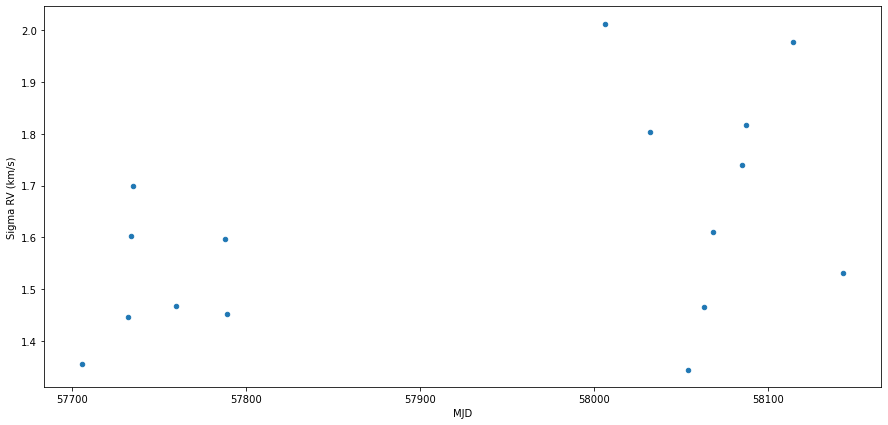

In [117]:
weighted_avg_df.plot(x='MJD', y='Sigma RV (km/s)', kind='scatter', figsize=(15,7))

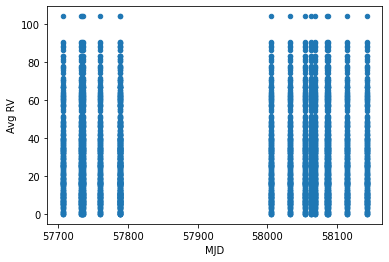

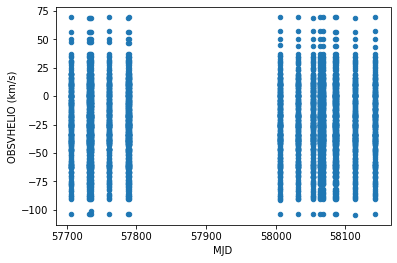

In [118]:
# Plots of avg RVs and all RVs

rv_avg_plot = df_cutoff.plot(x = 'MJD', y = 'Avg RV', kind = 'scatter')
rv_all_plot = df_cutoff.plot(x = 'MJD', y = 'OBSVHELIO (km/s)', kind = 'scatter')

In [21]:
df_test = df[df['Target ID'] == 'apo25m.5226.150-08-RV.2M03252400+4614203']

In [22]:
df_test

,Target ID,MJD,OBSVHELIO (km/s),Avg RV,ΔRV
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,-86.460343,-0.105361
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080,-86.460343,0.364263
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830,-86.460343,-0.070487
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440,-86.460343,-0.072097
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565,-86.460343,-0.109222
10,apo25m.5226.150-08-RV.2M03252400+4614203,58063,-86.519880,-86.460343,-0.059537
9,apo25m.5226.150-08-RV.2M03252400+4614203,58054,-86.564070,-86.460343,-0.103727
8,apo25m.5226.150-08-RV.2M03252400+4614203,58032,-86.379560,-86.460343,0.080783
11,apo25m.5226.150-08-RV.2M03252400+4614203,58068,-86.524210,-86.460343,-0.063867
6,apo25m.5226.150-08-RV.2M03252400+4614203,57789,-86.457430,-86.460343,0.002913


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

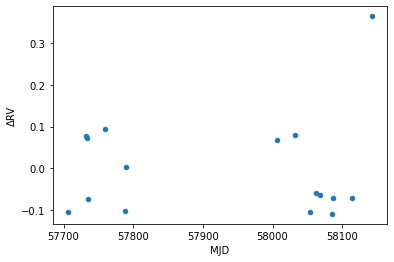

In [23]:
df_test.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter')

### Try PCA

In [54]:
features = ['MJD', 'ΔRV']

In [55]:
x2 = df.loc[:, features].values

In [56]:
y2 = df.loc[:, ['Target ID']].values

In [57]:
x2 = StandardScaler().fit_transform(x2)

In [58]:
x2.shape

(3632, 2)

In [59]:
# Check standard dev is 1.0

np.mean(x2), np.std(x2)

(1.5883323015861432e-18, 1.0)

In [60]:
feat_cols = ['feature'+str(i) for i in range(x2.shape[1])]

In [61]:
normalised_data = pd.DataFrame(x2,columns=feat_cols)

In [62]:
normalised_data.tail()

,feature0,feature1
3627,-1.212567,0.000014
3628,-1.370993,0.000009
3629,1.115074,0.000012
3630,-0.865249,0.000013
3631,1.291780,0.000016


In [63]:
pca = PCA(n_components = 2)

In [64]:
principalComponents = pca.fit_transform(x2)

In [65]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [66]:
principalDf.tail()

,principal component 1,principal component 2
3627,0.857405,-0.857424
3628,0.969432,-0.969445
3629,-0.788485,0.788468
3630,0.611814,-0.611832
3631,-0.913437,0.913415


In [67]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.51636992 0.48363008]


<Figure size 432x288 with 0 Axes>

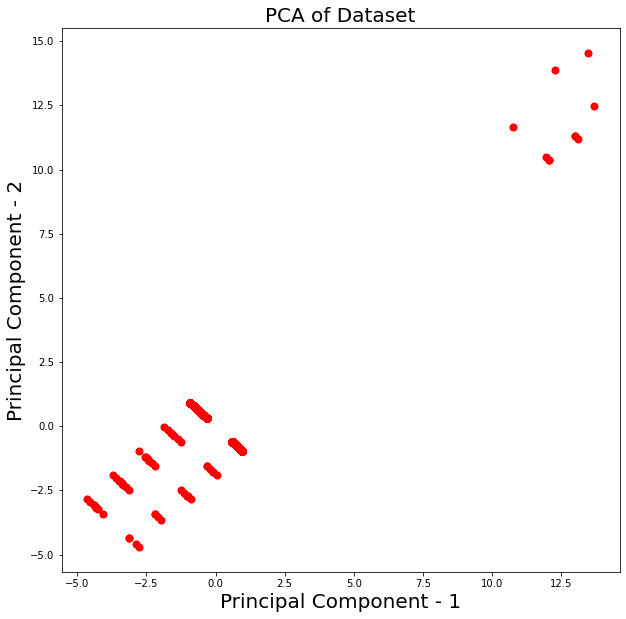

In [68]:
plt.figure()
plt.figure(figsize=(10,10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA of Dataset",fontsize=20)
targets = [df['Target ID']]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Target ID'] == target
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

# plt.legend(targets,prop={'size': 15})

In [165]:
finalDf = pd.concat([principalDf, df[['Target ID']]], axis = 1)

In [166]:
finalDf

,principal component 1,principal component 2,Target ID
0,-0.018731,-1.022855,apo25m.5226.150-08-RV.2M03252400+4614203
1,-0.025336,-0.914397,apo25m.5226.150-08-RV.2M03252400+4614203
2,-0.025844,-0.906054,apo25m.5226.150-08-RV.2M03252400+4614203
3,-0.026098,-0.901884,apo25m.5226.150-08-RV.2M03252400+4614203
4,-0.032449,-0.797598,apo25m.5226.150-08-RV.2M03252400+4614203
...,...,...,...
3627,-0.109078,0.488988,apo25m.5226.150-08-RV.2M03415658+4626067
3628,-0.113397,0.559901,apo25m.5226.150-08-RV.2M03415658+4626067
3629,-0.113905,0.568244,apo25m.5226.150-08-RV.2M03415658+4626067
3630,-0.120764,0.680872,apo25m.5226.150-08-RV.2M03415658+4626067
